# PTM PPI Shortcut analysis

In [1]:
import sys, pandas as pd, os, matplotlib.pyplot as plt, sklearn
from sklearn import tree

sys.path.append("../src")



In [2]:
trainfile="../temp/train.json"
testfile="../temp/test.json"
valfile="../temp/val.json"
largescalefile = "../temp/markers_largescale_multiclass.json"


In [3]:
from model_nb_tree_classifier import ModelNBTreeClassifier
m = ModelNBTreeClassifier("PROTPART1", "PROTPART0")



In [4]:
def print_report(actual, pred, latex=True):

    pos_f1 = sklearn.metrics.f1_score(actual, pred, labels=[1, 2, 3, 4, 5, 6], average='micro',
                                  sample_weight=None, zero_division='warn')
    all_f1 = sklearn.metrics.f1_score(actual, pred, average='micro', sample_weight=None, zero_division='warn')
    print(sklearn.metrics.classification_report(actual,
                                            pred,
                                            output_dict=False,
                                            labels=[1, 2, 3, 4, 5, 6])
     )
    
    if latex:
        
        d = sklearn.metrics.classification_report(actual,
                                                pred,
                                                output_dict=True,
                                                labels=[1, 2, 3, 4, 5, 6])
        return pd.DataFrame(d).T

In [6]:
df_train = pd.read_json(trainfile, orient="records")
m.train(df_train["x"], df_train["y"])

print_report(df_train["y"], m.predict(df_train["x"]), False)



              precision    recall  f1-score   support

           1       0.61      0.43      0.50       139
           2       0.54      0.50      0.52        28
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         2

   micro avg       0.59      0.39      0.47       189
   macro avg       0.19      0.16      0.17       189
weighted avg       0.53      0.39      0.45       189



/Users/aeg/venv/shortcuts/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aeg/venv/shortcuts/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aeg/venv/shortcuts/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
df_val = pd.read_json(valfile, orient="records")
print_report(df_val["y"], m.predict(df_val["x"]), False)




              precision    recall  f1-score   support

           1       0.62      0.38      0.47        21
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0

   micro avg       0.62      0.24      0.34        34
   macro avg       0.10      0.06      0.08        34
weighted avg       0.38      0.24      0.29        34



/Users/aeg/venv/shortcuts/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aeg/venv/shortcuts/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aeg/venv/shortcuts/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aeg/venv/shortcuts/lib/

In [9]:
def get_top_discrimintary_keywords(model, label_index ) :
    index_to_vocab = {i:v  for v,i in model.vocab.items()}

    return sorted( [ (index_to_vocab[i],p) for i,p in enumerate(m.nb_model.feature_log_prob_[label_index])], 
           reverse=True, key=lambda x: x[1])[:20]

get_top_discrimintary_keywords(m, 1)



[('protpart1', -2.318624105392222),
 ('protpart0', -2.4199323038451004),
 ('prtig0', -3.1479957495112734),
 ('phosphorylation', -3.440766891470526),
 ('prtig1', -3.5333596782983507),
 ('kinase', -3.8668512867814258),
 ('prtig2', -3.988548221758945),
 ('cells', -4.036750323576824),
 ('protein', -4.0681008534609),
 ('activation', -4.2339975305874535),
 ('cell', -4.2339975305874535),
 ('activity', -4.31216230343679),
 ('phosphorylated', -4.345223165697678),
 ('induced', -4.5704697672086665),
 ('tyrosine', -4.647009844331),
 ('prtig3', -4.693529859965894),
 ('binding', -4.767637832119616),
 ('human', -4.861666781767892),
 ('vitro', -4.890240154211948),
 ('signaling', -4.934691916782782)]

In [10]:
df_test = pd.read_json(testfile, orient="records")
print_report(df_test["y"], m.predict(df_test["x"]))




              precision    recall  f1-score   support

           1       0.45      0.34      0.39        44
           2       0.50      0.33      0.40         6
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0

   micro avg       0.46      0.30      0.37        56
   macro avg       0.16      0.11      0.13        56
weighted avg       0.41      0.30      0.35        56



/Users/aeg/venv/shortcuts/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aeg/venv/shortcuts/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aeg/venv/shortcuts/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aeg/venv/shortcuts/lib/

,precision,recall,f1-score,support
1,0.454545,0.340909,0.389610,44.0
2,0.500000,0.333333,0.400000,6.0
3,0.000000,0.000000,0.000000,4.0
4,0.000000,0.000000,0.000000,1.0
5,0.000000,0.000000,0.000000,1.0
6,0.000000,0.000000,0.000000,0.0
micro avg,0.459459,0.303571,0.365591,56.0
macro avg,0.159091,0.112374,0.131602,56.0
weighted avg,0.410714,0.303571,0.348980,56.0


In [11]:
df_largescale_hq = pd.read_json(largescalefile, orient="records")
print_report(df_largescale_hq["y"], m.predict(df_largescale_hq["x"]))



              precision    recall  f1-score   support

           1       1.00      0.32      0.49      5721
           2       0.19      0.29      0.23        42
           3       0.00      0.00      0.00        23
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         0

   micro avg       0.97      0.32      0.48      5794
   macro avg       0.20      0.10      0.12      5794
weighted avg       0.99      0.32      0.48      5794



/Users/aeg/venv/shortcuts/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aeg/venv/shortcuts/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aeg/venv/shortcuts/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aeg/venv/shortcuts/lib/

,precision,recall,f1-score,support
1,0.997837,0.322496,0.487450,5721.0
2,0.193548,0.285714,0.230769,42.0
3,0.000000,0.000000,0.000000,23.0
4,0.000000,0.000000,0.000000,5.0
5,0.000000,0.000000,0.000000,3.0
6,0.000000,0.000000,0.000000,0.0
micro avg,0.971743,0.320504,0.482025,5794.0
macro avg,0.198564,0.101368,0.119703,5794.0
weighted avg,0.986668,0.320504,0.482982,5794.0


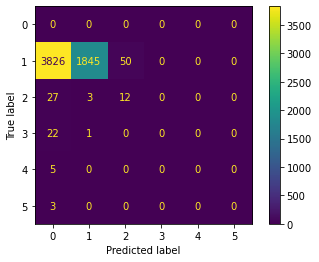

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df_largescale_hq["y"], m.predict(df_largescale_hq["x"]))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

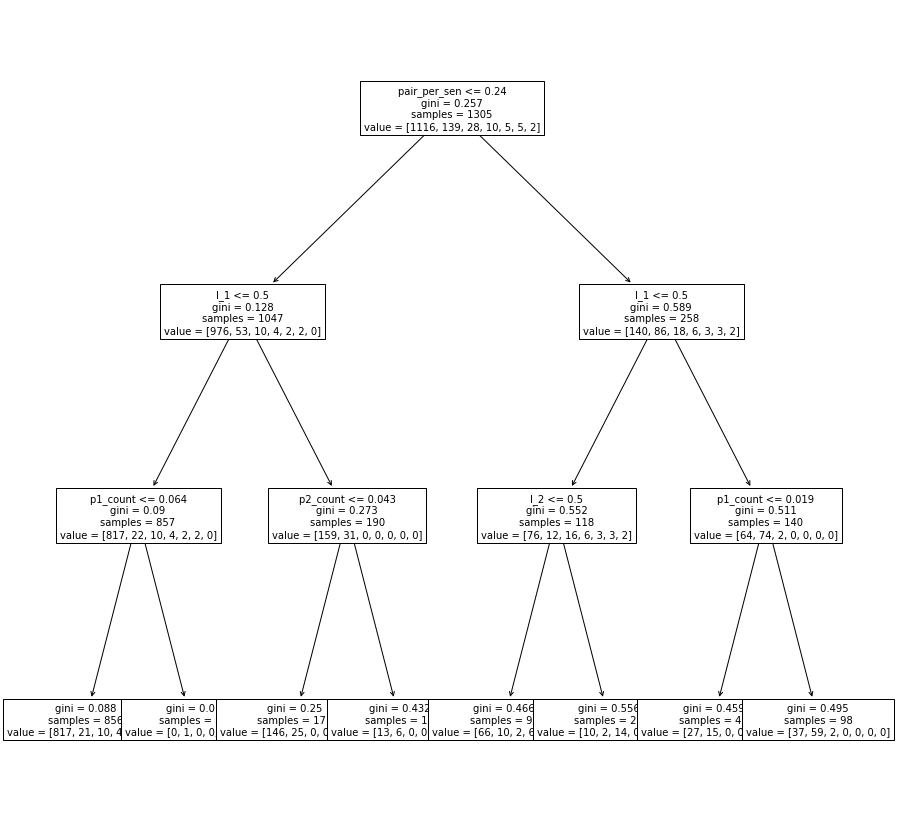

In [12]:
_, ax = plt.subplots(1,1, figsize=(15,15))

tree.plot_tree(m.tree_model, ax=ax, fontsize=10, feature_names=m.feature_names)

plt.show()

